특성공학을 하는 이유
  - 학습시간 단축
  - 모델을 단순화 쉽게 해석
  - 과적합을 줄여서 테스트 세트 성능 향상  (훈련성능 테스트성능 트레이드오프)

제거대상
  - 독립변수간의 높은 상관관계  
  - 중복성
  - 무관련성

다중공선성
  - 회귀모델에서 하나의 특성을 예측할수 있다면 해당데이터 세트의 다른 특성을 사용하더라도 예측이 가능한 현상

차원의 저주
  - 차원의 수가 증가하면, 특성이 증가하면 데이터를 더 정확하게 설명할수 있는데. 해당 모델이 새로운 데이터로 일반화되기 어렵다. 그래서 과적합 발생    

트리계열의 머신러닝으로 빠르게 데이터의 중요특징을 파악

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/train_20.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory
0,842,0,2.2,0,1,0,7
1,1021,1,0.5,1,0,1,53
2,563,1,0.5,1,2,1,41
3,615,1,2.5,0,0,0,10
4,1821,1,1.2,0,13,1,44


In [6]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [9]:
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [13]:
indexs = np.argsort(model.feature_importances_)[::-1]
indexs

array([0, 2, 4, 5, 3, 1])

In [15]:
x.columns[indexs]

Index(['battery_power', 'clock_speed', 'fc', 'four_g', 'dual_sim', 'blue'], dtype='object')

In [17]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000


In [18]:
data.value_counts()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory
501            0     2.3          0         12  1       54            1
1494           0     1.9          0         2   1       47            1
1504           0     1.9          1         7   1       25            1
                     1.5          0         12  1       34            1
1503           1     0.7          0         10  1       43            1
                                                                     ..
972            1     1.7          0         0   1       54            1
                     1.3          0         8   0       44            1
                     0.5          1         5   0       13            1
970            1     1.3          1         5   0       59            1
1998           1     1.2          0         8   0       31            1
Length: 2000, dtype: int64

통계 테스트를 이용해서 출력변수와 상관관계가 가장 강한 특성을 확인
  - 사이킷런의 SelectKBest 클래스 : 상위 k개의 특성을 선택하기위한 통계 테스트 세트를 제공
  - 카이제곱 통계테스트를 사용

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [23]:
bestFeature = SelectKBest(score_func=chi2, k = 3)
bestf = bestFeature.fit(x,y)
df_scores = pd.DataFrame(bestf.scores_)
df_columns = pd.DataFrame(x.columns)
scores = pd.concat([df_columns,df_scores],axis=1)
scores.columns = ['spec','score']
scores.nlargest(3,'score')  # 상위 3개 특성을 추출

,spec,score
0,battery_power,11058.155685
4,fc,290.812265
1,blue,36.976457


상관관계 히트맵 확인

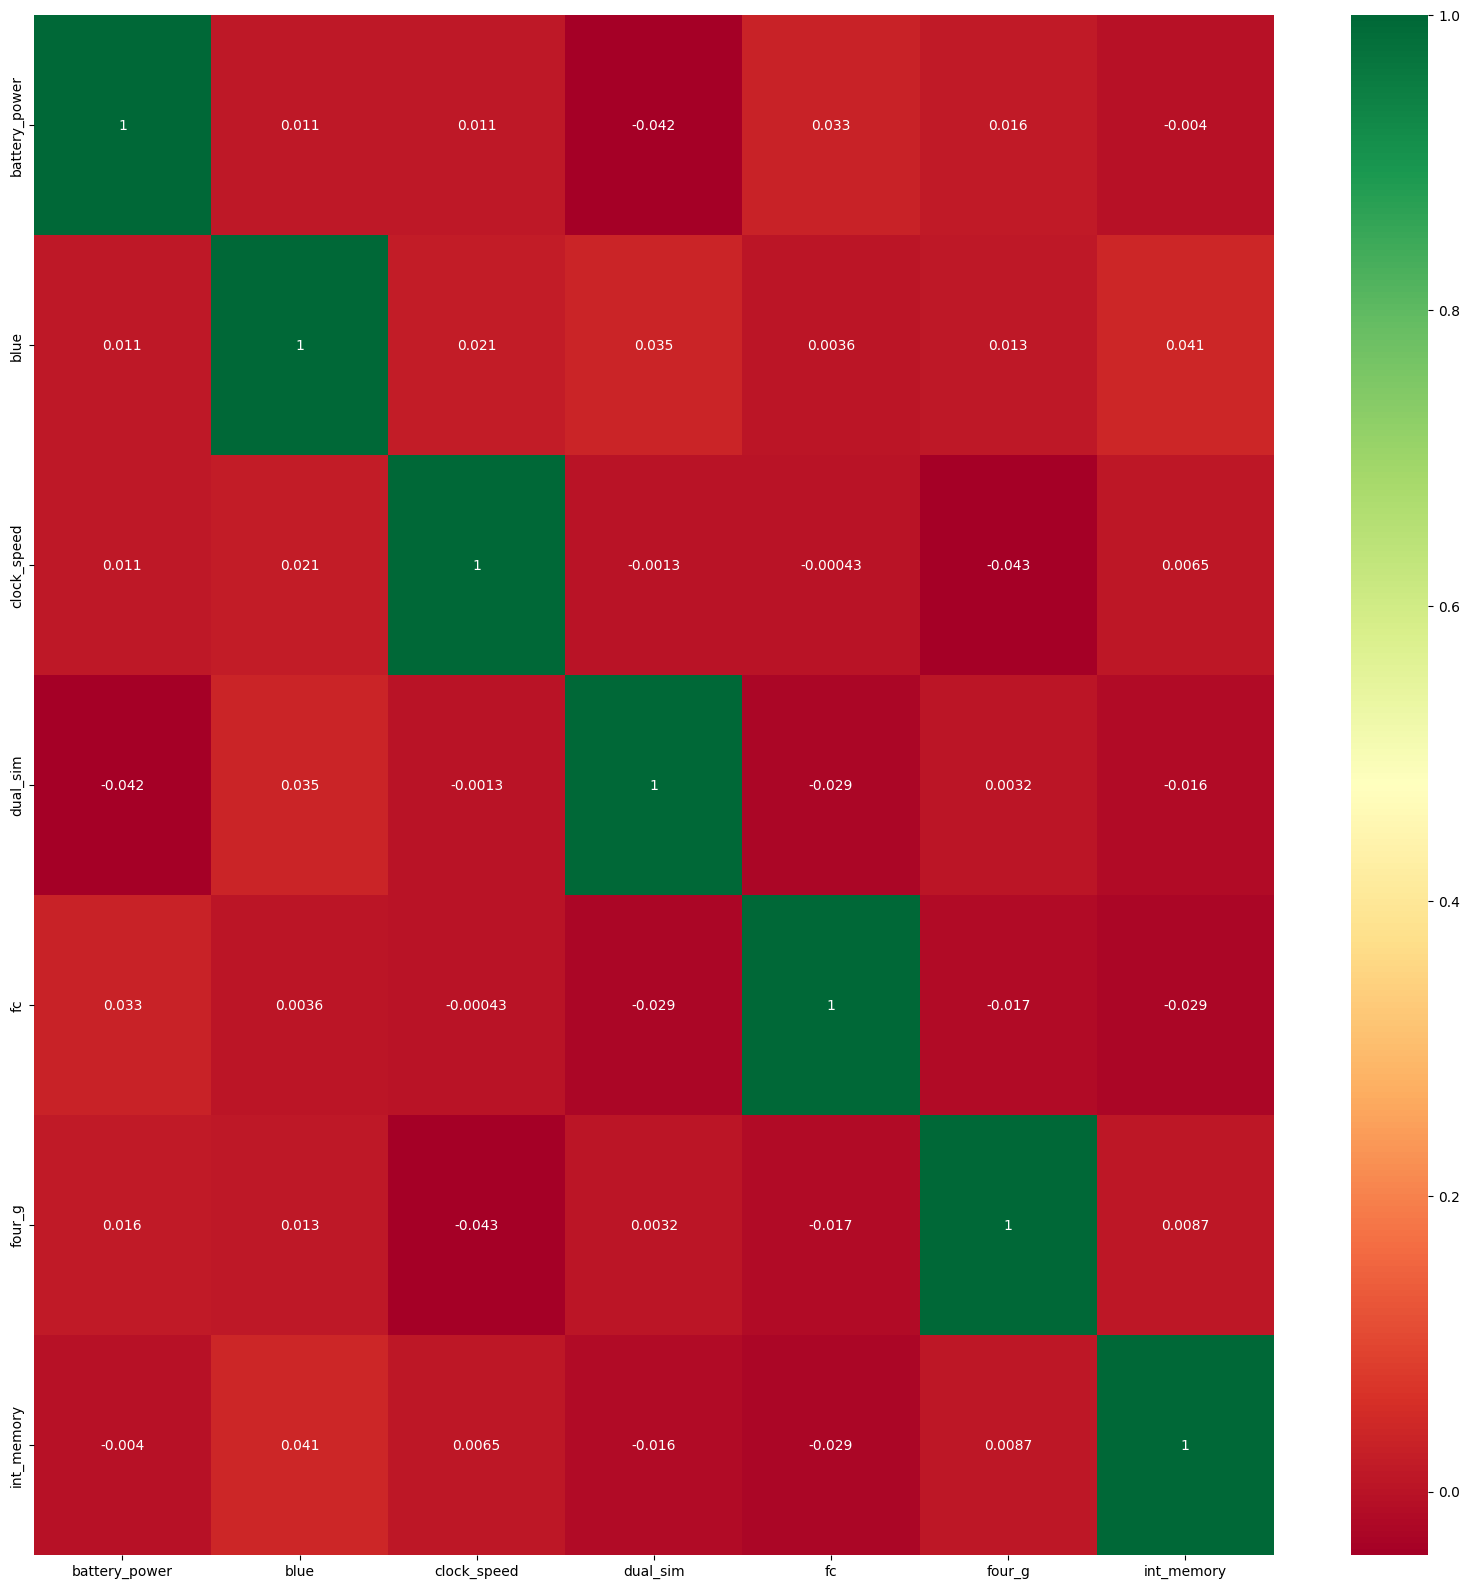

In [28]:
import seaborn as sns
data = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/train_20.csv')
correlation_matirix = data.corr()
top_corr_feature =  correlation_matirix.index
plt.figure(figsize=(20,20))
# 출력
sns.heatmap(correlation_matirix,annot=True,cmap='RdYlGn')
plt.show()

중요특성을 자동으로 선택하는 방법
  - 래퍼 기반
    - forward selection
      - 반복할때마다 모델 성능을 개선하기위해 특성이 추가
      - 특성이 향상되면 해당 특성이 유지되고, 개선하지 못한 특성을 제거
    - backward selection
      - 데이터세트에 있는 모든 특성이 있는 상태로 출발
      - 반복할때마다 가장 낮은 특성을 제거
    - recursive selection(재귀적 특성 제거)
      - 반복적으로 모델을 생성해서 반복할때마다 성능이 최고       
      또는 최적인 특성을 저장하고 남은 특성으로 다음 모델을 구성 특성이 소진될때까지 반복
  - 필터 기반
     - 지표를 지정하고 해당 지표를 기반으로 특성을 필터링
      - 피어슨 상관관계(Pearson's correlation)
      - 선형판별 분석(Liear discriminant analysis, LDA)
        - 범주형 변수에서 두개 이상의 레벨에서 특성을 뽑아내거나 분리하는 선형 조합을 찾는데 사용
      - 분산분석(Analysis of Vaiance, ANOVA) : LDA와 유사, 하나이상의 범주형 독립변수와 하나의 연속 종속변수를 사용해 계산, 여러그룹의 평균이 같은지 여부를 알려주는 통계 테스트르 제공
    - 필터기반의 방법은 다중공선성을 제거하지 않은다
    
  - 임베디드 방법
    - 라쏘회귀
      - L1정규화 : 계수크기의 절대값에 해당하는 패널티를 추가
    - 릿지회귀
      - L2정규화 : 계수크기의 제곱값에 해당하는 패널티를 추가

데이터 전처리에 있어서 필요한 기능 및 기술
  - 대치 - 결측치 - 개인정보
  - 이상치 관리
  - 원-핫인코딩
  - 로그변환
  - 스케일링
  - 날짜 처리

결측치를 처리하는 방법
  - 제거    
  - 대치
    - 적당한 값
      - 수치
        - 전체데이터 : 평균, 중위수, 0
        - 중요컬럼별 그룹핑해서 평균, 중위수
      - 범주형
        - 최빈값

In [41]:
from concurrent.futures import thread
# EX  임계치를 설정해서 제거
# 임계치보다 높은 비율의 결측치를 갖는 열을 제거
threshold = 0.6
data[(data.isnull().mean()< threshold).index]

# 임계치보다 높은 비율의 결측치를 갖는 행을 제거
data = data.loc[data.isnull().mean(axis=1) < threshold]
data


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory
0,842,0,2.2,0,1,0,7
1,1021,1,0.5,1,0,1,53
2,563,1,0.5,1,2,1,41
3,615,1,2.5,0,0,0,10
4,1821,1,1.2,0,13,1,44
...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2
1996,1965,1,2.6,1,0,0,39
1997,1911,0,0.9,1,1,1,36
1998,1512,0,0.9,0,4,1,46


In [42]:
# 대치 

<Axes: >

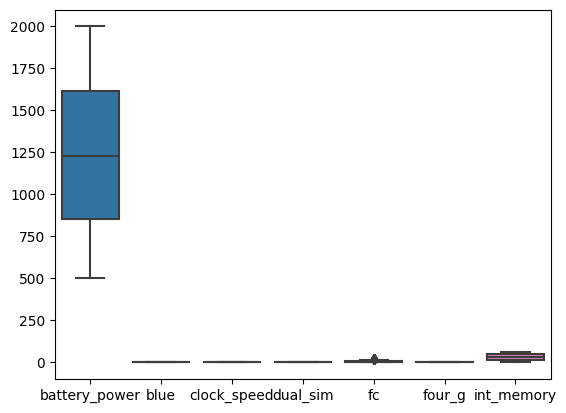

In [43]:
# 이상치 관리 - boxplot 통해서 간단하고 빠르게 확인
sns.boxplot(data)


In [52]:
IQR = data.describe().loc['75%'] - data.describe().loc['25%']

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory
0,78.5,-1.0,0.7,-1.0,-5.0,-1.0,-25.0
1,257.5,0.0,-1.0,0.0,-6.0,0.0,21.0
2,-200.5,0.0,-1.0,0.0,-4.0,0.0,9.0
3,-148.5,0.0,1.0,-1.0,-6.0,-1.0,-22.0
4,1057.5,0.0,-0.3,-1.0,7.0,0.0,12.0
...,...,...,...,...,...,...,...
1995,30.5,0.0,-1.0,0.0,-6.0,0.0,-30.0
1996,1201.5,0.0,1.1,0.0,-6.0,-1.0,7.0
1997,1147.5,-1.0,-0.6,0.0,-5.0,0.0,4.0
1998,748.5,-1.0,-0.6,-1.0,-2.0,0.0,14.0


표준편차 - 확인

one-hot 인코딩

In [53]:
test_df = pd.DataFrame({
    'color' : ['red','red','red','blue','yellow']
})
test_df

,color
0,red
1,red
2,red
3,blue
4,yellow


In [55]:
pd.get_dummies(test_df)

,color_blue,color_red,color_yellow
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1


로그변환
  - 지나치게 치우져진 값을 수정하는데 사용
  - 로그변환이 적용되면 데이터 분포가 정규화

In [56]:
# 10 -> 15  5/10  50%
# 50 -> 55  5/50  10%  
# log(x+1) -> 양수에만 적용하고 1을 더해서 출력이 양수가 되도록 

In [64]:
data = pd.DataFrame({
    'value' : [3,67,-17,44,37,3,31,-38]
})
data['log+1'] = (data['value']+1).transform(np.log)

# 음수처리
data['log'] = (data['value']-data['value'].min()+1).transform(np.log)
data

,value,log+1,log
0,3,1.386294,3.737670
1,67,4.219508,4.663439
2,-17,NaN,3.091042
3,44,3.806662,4.418841
4,37,3.637586,4.330733
5,3,1.386294,3.737670
6,31,3.465736,4.248495
7,-38,NaN,0.000000


스케일링
  - 정규화(최대 최소 정규화)
    - 특성값을 모두 0과 1사이의 값으로 조정
     -  x - xmin / xmax - xmin
  - 표준화(z-score)
    - 평균과 표준편차
    - x - mean / std


In [ ]:
# 정규화
data = pd.DataFrame({
    'value' : [3,67,-17,44,37,3,31,-38]
})
# 각자 해 보기

날자처리
  - 년 월 단위로 컬럼만들어서 추가해서 시계열데이터(연속형)를 범주형 데이터로 분리
  - 특정 날자 이전 이후
  - 요일
  - 주말 여부
  - 휴일 여부

1. 지도학습vs 비지도학습
2. 데이터 전처리 방법
  - 이진화
  - 평균 제거
  - 스케일링
  - 정규화
3. 레이블 인코딩
4. 로지스틱회귀 분류기
5. 나이브 베이즈 분류기
6. 서포트벡터 머신과 SVM 분류기
7. 선형회귀 다항식 회귀
8. 단일변수 선형회귀 와 다중 변수 선형회귀
9. 서포트벡터 회귀를 사용한 주택가격 추정
10 AutoML을 통한 최적의 머신러닝 모델 선정
11. piplne & 하이퍼 파라메터 튜닝

In [83]:
# 이진화
import numpy as np
from sklearn.preprocessing import Binarizer, scale, StandardScaler
data = np.array([
                  [0.12,1.5,-0.3],
                  [1.12,2.5,-1.3],
                  [-0.12,0.5,0.3]
                ])
Binarizer(threshold=0.0).transform(data)

array([[1., 1., 0.],
       [1., 1., 0.],
       [0., 1., 1.]])

In [72]:
# 평균제거 : 각 컬럼에서 평균을 제거하면 각 특성이 0을 중심으로 분포하도록 만든다
# 특성벡터에서 편향을 제거할때 수행함
# 데이터에서 편향을 처리하는 방법 - 검색해서 알아볼것

In [77]:
data.mean(axis=0), data.std(axis=0)

(array([ 0.37333333,  1.5       , -0.43333333]),
 array([0.53698748, 0.81649658, 0.65996633]))

In [80]:
data_scaled = scale(data)
data_scaled, data_scaled.mean(axis=0)

(array([[-0.47176767,  0.        ,  0.20203051],
        [ 1.39047313,  1.22474487, -1.31319831],
        [-0.91870546, -1.22474487,  1.1111678 ]]),
 array([7.40148683e-17, 0.00000000e+00, 7.40148683e-17]))

In [81]:
data_scaled.std(axis=0)

array([1., 1., 1.])

In [85]:
StandardScaler().fit_transform(data), data_scaled

(array([[-0.47176767,  0.        ,  0.20203051],
        [ 1.39047313,  1.22474487, -1.31319831],
        [-0.91870546, -1.22474487,  1.1111678 ]]),
 array([[-0.47176767,  0.        ,  0.20203051],
        [ 1.39047313,  1.22474487, -1.31319831],
        [-0.91870546, -1.22474487,  1.1111678 ]]))

In [86]:
# 각 특성에 부여된 가중치가 거의 동일하고 이상치의 중요도가 크지 않도록 특성을 조정
# 정규화 - 데이터가 정규분포형대를 취하도록
# L1정규화(각행에서 절대값의 합이 1이되도록 작동) , L2정규화(각항에서 제곱의 합이 1이 되도록)
# L1정규화가 보통 더 강력한 기술로 간주 - 이상치에 영향을 적게 받음
# L2정규화 : 이상치도 정상데이터로 간주할때.. 더 좋은 성능

In [ ]:
from sklearn import preprocessing
preprocessing.normalize(data, norm='l1')
preprocessing.normalize(data, norm='l2')

레이블 인코딩

In [89]:
label_data = ['a','a','c','f','d']
encoder = preprocessing.LabelEncoder()
encoder.fit_transform(label_data)

array([0, 0, 1, 3, 2])

로지스틱회귀 - 분류모델이기때문에 분류기라고 한다

로지스틱회귀분류기
  - 시그모이드 함수 사용 이유
    - 0,1사이로 제한
    - 미분이 빠르다
    - 비선형으로 변경하기 용이하다

In [90]:
# 적절한 셈플데이터를 만들거나 가져와서 모델을 적용해 본다.

나이브 베이즈 분류기
  - 이벤트와 관련된 다양한 조건에 따라 이벤트가 발생할 확률을 설명
  - 주어진 특성의 값에 다른 특성의 값이 독립임을 가정하고 이 독립 가정을 나이브에 해당

In [91]:
from sklearn.naive_bayes import GaussianNB

컨퓨전 행렬

In [92]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score

서포트벡터 머신

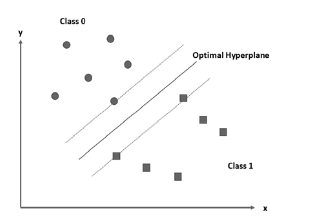

회귀
  - 선형회귀
  - y = ax +b
  - 평균 제곱 오차(MSE)
    - 거의 항상 양수, 0에 가까울 수록 좋다
  - 결정계수 
    - R2

In [93]:
from sklearn.linear_model import LinearRegression

단일변수 회귀 

In [116]:
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import matplotlib.pyplot as plt
data = 'https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data_reg_20.txt'
data = pd.read_csv(data,delimiter=',', header=None)
x,y = data.iloc[:,1], data.iloc[:,-1]

In [117]:
from sklearn.linear_model import LinearRegression

In [121]:
# 데이터나누고  8:2
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test =  train_test_split(x,y)
split_num = int(0.8*len(x))
x_train,y_train = x[:split_num], y[:split_num]
x_test, y_test = x[split_num:], y[split_num:]

In [124]:
# 모델적용
lr = LinearRegression()
lr.fit(np.array(x_train).reshape(-1,1),y_train)

LinearRegression()

In [126]:
# 결과 예측
y_test_predict = lr.predict(np.array(x_test).reshape(-1, 1))

In [ ]:
# 결과 그래프 시각화

머신러닝 저장

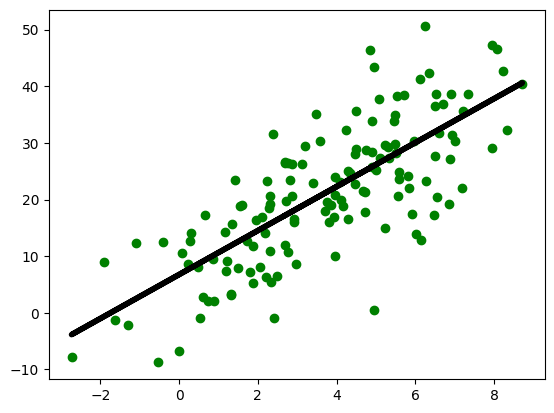

In [127]:
plt.scatter(x_test,y_test,color='green')
plt.plot(x_test,y_test_predict,color='black', linewidth=4)
plt.show()

성능지표로 메트릭스를 사용

In [129]:
print('Linear regressor performance')
print('MAE Mean absolute error ', round(sm.mean_absolute_error(y_test,y_test_predict),2))
print('MSE Mean squared error ', round(sm.mean_squared_error(y_test,y_test_predict),2))
print('MSE Median squared error ', round(sm.median_absolute_error(y_test,y_test_predict),2))
print('Explain variance score ', round(sm.explained_variance_score(y_test,y_test_predict),2))
print('R2 ', round(sm.r2_score(y_test,y_test_predict),2))

Linear regressor performance
MAE Mean absolute error  6.48
MSE Mean squared error  64.86
MSE Median squared error  5.61
Explain variance score  0.57
R2  0.57


In [130]:
import pickle

In [131]:
with open('./output_model.pkl', 'wb') as f:
  pickle.dump(lr, f)

모델 불러오기

In [132]:
with open('./output_model.pkl', 'rb') as f:
  new_model = pickle.load(f)

In [134]:
new_model_predict =  new_model.predict(np.array(x_test).reshape(-1,1))

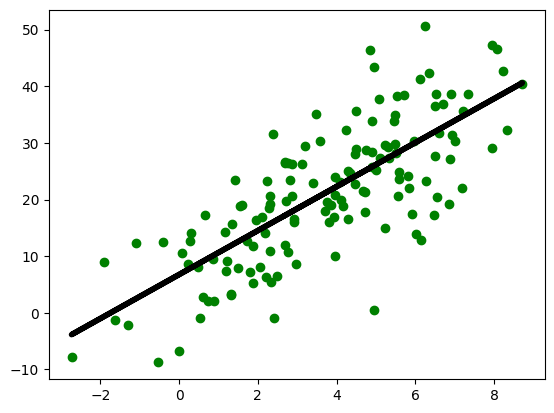

In [135]:
plt.scatter(x_test,y_test,color='green')
plt.plot(x_test,new_model_predict,color='black', linewidth=4)
plt.show()

설명된 분산 또는 변동 explained variance
  - 오차들이 차지하는 비율

다변수 회귀분석 - 위에서 적용한 단일 회귀분석에서 컬럼을 다 사용

선형 - > 비선형으로 변경해서 훈련 및 예측  차수를 10차로 변경

In [147]:
from sklearn.preprocessing  import PolynomialFeatures
x_train = data.iloc[:split_num,:-1]
y_train = data.iloc[:split_num,-1]
x_test = data.iloc[split_num:,:-1]
y_test = data.iloc[split_num:,-1]

In [148]:
pl = PolynomialFeatures(degree=10)
pl.fit(x_train)
x_train_poly = pl.transform(x_train)
x_test_poly = pl.transform(x_test)

In [149]:
lr = LinearRegression()
lr.fit(x_train_poly,y_train)
y_test_poly_predict = lr.predict(x_test_poly)

In [150]:
print('평가용 Linear regressor performance')
print('MAE Mean absolute error ', round(sm.mean_absolute_error(y_test,y_test_poly_predict),2))
print('MSE Mean squared error ', round(sm.mean_squared_error(y_test,y_test_poly_predict),2))
print('MSE Median squared error ', round(sm.median_absolute_error(y_test,y_test_poly_predict),2))
print('Explain variance score ', round(sm.explained_variance_score(y_test,y_test_poly_predict),2))
print('R2 ', round(sm.r2_score(y_test,y_test_poly_predict),2))

Linear regressor performance
MAE Mean absolute error  84.29
MSE Mean squared error  173805.12
MSE Median squared error  6.13
Explain variance score  -1153.61
R2  -1155.87


In [151]:
x_train_poly_predict = lr.predict(x_train_poly)
print('학습용 Linear regressor performance')
print('MAE Mean absolute error ', round(sm.mean_absolute_error(y_train,x_train_poly_predict),2))
print('MSE Mean squared error ', round(sm.mean_squared_error(y_train,x_train_poly_predict),2))
print('MSE Median squared error ', round(sm.median_absolute_error(y_train,x_train_poly_predict),2))
print('Explain variance score ', round(sm.explained_variance_score(y_train,x_train_poly_predict),2))
print('R2 ', round(sm.r2_score(y_train,x_train_poly_predict),2))

학습용 Linear regressor performance
MAE Mean absolute error  2.3
MSE Mean squared error  10.75
MSE Median squared error  1.49
Explain variance score  0.93
R2  0.93


In [ ]:
!pip install pycaret

In [157]:
data.columns = ['a','b','c','target']

In [158]:
from pycaret import regression
regression.setup(data = data, target = 'target')
best = regression.compare_models(n_select=5)

,Description,Value
0,Session id,2480
1,Target,target
2,Target type,Regression
3,Original data shape,"(700, 4)"
4,Transformed data shape,"(700, 4)"
5,Transformed train set shape,"(489, 4)"
6,Transformed test set shape,"(211, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,3.5826,20.4792,4.5021,0.8472,0.3468,0.3865,0.0350
lr,Linear Regression,3.5815,20.5002,4.5042,0.8470,0.3510,0.3925,0.3850
ridge,Ridge Regression,3.5814,20.5000,4.5043,0.8470,0.3512,0.3930,0.0280
lar,Least Angle Regression,3.5815,20.5002,4.5042,0.8470,0.3510,0.3925,0.0480
br,Bayesian Ridge,3.5813,20.5003,4.5044,0.8470,0.3517,0.3939,0.0280
lasso,Lasso Regression,3.6377,21.0287,4.5693,0.8444,0.3595,0.4779,0.0300
llar,Lasso Least Angle Regression,3.6377,21.0287,4.5693,0.8444,0.3595,0.4779,0.0480
en,Elastic Net,3.7228,21.9911,4.6778,0.8389,0.3595,0.5481,0.0270
gbr,Gradient Boosting Regressor,4.1618,26.6801,5.1356,0.8071,0.3816,0.5502,0.1920
et,Extra Trees Regressor,4.2207,28.0843,5.2860,0.7988,0.3759,0.5101,0.2260


Processing:   0%|          | 0/85 [00:00<?, ?it/s]